In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving fruits.zip to fruits.zip


In [ ]:
import zipfile
import os

# Extract the uploaded ZIP
with zipfile.ZipFile("fruits.zip", 'r') as zip_ref:
    zip_ref.extractall("fruits")


In [ ]:
train_path = "fruits/fruits"
img_size = (100, 100)

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)


Found 17 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.3241 - loss: 2.9511 - val_accuracy: 0.3333 - val_loss: 12.0719
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4715 - loss: 6.5099 - val_accuracy: 0.3333 - val_loss: 5.5168
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.4402 - loss: 2.4457 - val_accuracy: 0.3333 - val_loss: 2.6899
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5303 - loss: 2.0644 - val_accuracy: 0.3333 - val_loss: 2.6278
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5596 - loss: 2.4556 - val_accuracy: 0.6667 - val_loss: 4.3574
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7574 - loss: 0.9673 - val_accuracy: 0.6667 - val_loss: 4.9801
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.7680 - loss: 0.9069 - val_accuracy: 0.3333 - val_loss: 5.9888
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.6759 - loss: 2.0882 - val_accuracy: 0.3333 - val_loss: 

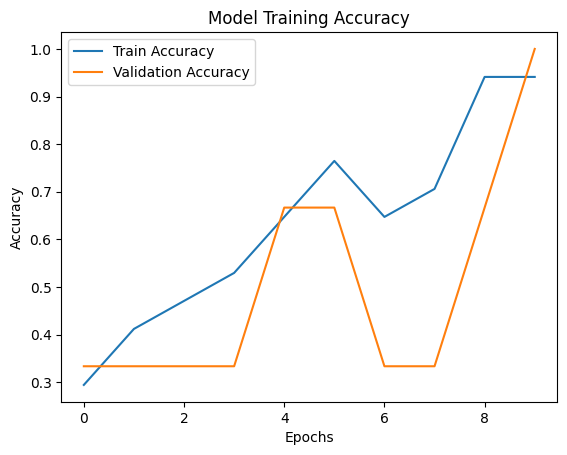

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Training Accuracy")
plt.show()


In [ ]:
uploaded = files.upload()


Saving Image_2.jpg to Image_2.jpg


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_data.class_indices.keys())[np.argmax(pred)]
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: apples


In [ ]:
uploaded = files.upload()


Saving 124.jpg to 124.jpg


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_data.class_indices.keys())[np.argmax(pred)]
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: black cherry


In [ ]:
uploaded = files.upload()

Saving 10.jpg to 10.jpg


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_data.class_indices.keys())[np.argmax(pred)]
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: banana
